<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/3_%EC%97%B0%EB%A0%B9%EB%B3%84_%EC%9D%B8%EA%B5%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연령별 인구 현황 분석
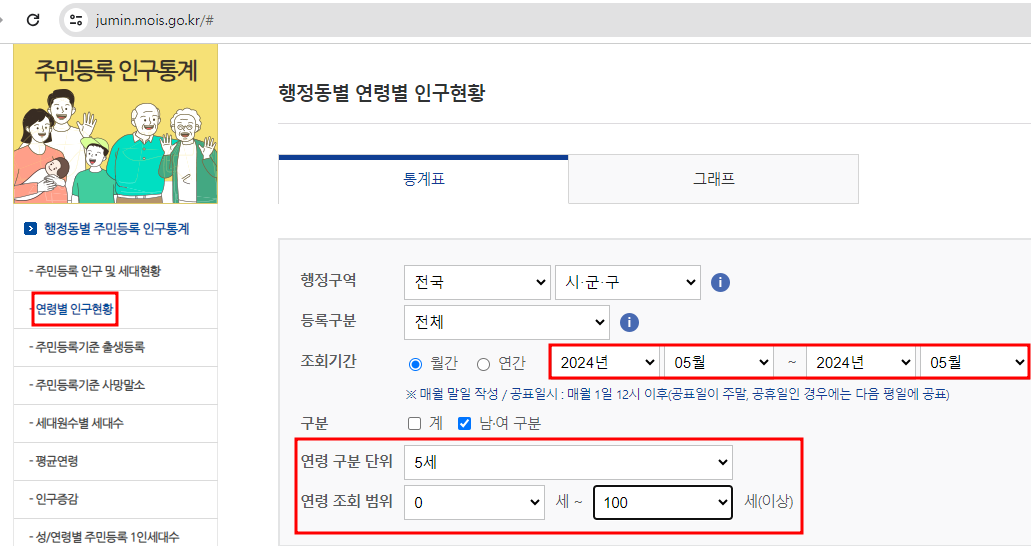


In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 수집
- https://jumin.mois.go.kr/
- skiprows : 건너뛰어야 할 행 지정
- index_col : 인덱스로 지정할 열 이름
- usecols : 엑셀에서 필요 없는 컬럼을 빼고 가져올 때

### 데이터 로드

In [7]:
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx',skiprows=3, index_col='행정기관')
df

,행정기관코드,남 인구수,연령구간인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,0,"25,536,793","25,536,793","665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492",...,"2,114,411","2,120,204","1,801,740","1,227,132","956,354","813,019","501,377","195,715","46,461","7,177"
서울특별시,1100000000,"4,528,234","4,528,234","106,522","149,781","181,415","191,270","256,356","377,241","394,395",...,"361,856","365,803","331,360","230,038","181,317","133,512","73,384","27,542","7,093","1,149"
부산광역시,2600000000,"1,599,048","1,599,048","37,587","59,226","69,032","65,763","86,710","102,643","106,308",...,"138,551","154,009","143,784","102,792","76,590","58,458","31,646","11,153","2,825",370
대구광역시,2700000000,"1,162,463","1,162,463","28,921","46,403","54,590","54,868","68,451","76,445","79,090",...,"106,315","105,929","87,517","63,700","46,991","40,353","22,963","8,326","1,762",224
인천광역시,2800000000,"1,504,618","1,504,618","41,978","60,206","70,726","68,781","81,090","104,654","114,883",...,"128,913","127,417","100,587","61,328","47,414","37,863","23,571","9,699","2,481",401
광주광역시,2900000000,"698,255","698,255","19,125","30,278","37,343","38,104","46,048","51,489","48,022",...,"58,389","54,008","43,606","30,864","25,133","19,243","11,252","4,531","1,036",180
대전광역시,3000000000,"718,696","718,696","19,964","28,550","34,514","36,055","46,487","56,623","54,003",...,"59,120","57,143","47,873","31,366","23,362","19,286","11,715","4,552","1,063",181
울산광역시,3100000000,"566,063","566,063","14,788","24,405","29,077","27,809","30,263","38,173","38,690",...,"51,236","47,680","37,615","23,177","15,020","11,571","6,573","2,506",596,81
세종특별자치시,3600000000,"193,044","193,044","8,403","13,259","14,336","11,531","9,139","9,740","13,553",...,"11,544","10,488","8,520","5,259","3,630","3,152","2,183",989,261,36


In [8]:
# usecols='B,E:Y'
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx',skiprows=3, index_col='행정기관',usecols='B,E:Y')
df

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492","1,622,636","2,036,765","1,943,103",...,"2,132,424","2,096,569","1,707,343","1,085,712","772,713","524,970","240,328","62,362","10,423","1,569"
서울특별시,"106,522","149,781","181,415","191,270","256,356","377,241","394,395","321,703","361,432","332,717",...,"346,532","336,724","289,817","194,253","145,099","98,771","42,281","10,700","2,025",355
부산광역시,"37,587","59,226","69,032","65,763","86,710","102,643","106,308","94,701","125,135","116,767",...,"129,260","138,036","126,561","86,664","60,470","39,238","15,731","3,615",554,66
대구광역시,"28,921","46,403","54,590","54,868","68,451","76,445","79,090","70,664","87,114","86,774",...,"101,148","98,558","78,676","52,497","35,269","25,009","11,130","2,729",363,37
인천광역시,"41,978","60,206","70,726","68,781","81,090","104,654","114,883","102,906","128,089","117,911",...,"125,175","126,290","96,038","55,694","38,676","24,335","10,848","2,823",537,96
광주광역시,"19,125","30,278","37,343","38,104","46,048","51,489","48,022","41,752","56,547","55,245",...,"56,844","50,925","38,780","25,191","19,266","12,762","5,605","1,428",222,23
대전광역시,"19,964","28,550","34,514","36,055","46,487","56,623","54,003","46,106","54,606","53,679",...,"58,177","54,686","44,272","27,720","18,975","12,872","5,832","1,610",255,37
울산광역시,"14,788","24,405","29,077","27,809","30,263","38,173","38,690","35,773","46,786","43,972",...,"52,557","49,719","37,231","22,290","13,404","7,623","2,818",677,91,11
세종특별자치시,"8,403","13,259","14,336","11,531","9,139","9,740","13,553","15,604","20,052","17,969",...,"12,187","10,639","8,240","4,921","3,127","2,057",981,272,58,4


###  남, 여 데이터 프레임 생성
#### [실습] 남자 데이터 가져오기

In [9]:
df_man = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx',
                       skiprows=3, index_col='행정기관',usecols='B,E:Y')
df_man

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492","1,622,636","2,036,765","1,943,103",...,"2,132,424","2,096,569","1,707,343","1,085,712","772,713","524,970","240,328","62,362","10,423","1,569"
서울특별시,"106,522","149,781","181,415","191,270","256,356","377,241","394,395","321,703","361,432","332,717",...,"346,532","336,724","289,817","194,253","145,099","98,771","42,281","10,700","2,025",355
부산광역시,"37,587","59,226","69,032","65,763","86,710","102,643","106,308","94,701","125,135","116,767",...,"129,260","138,036","126,561","86,664","60,470","39,238","15,731","3,615",554,66
대구광역시,"28,921","46,403","54,590","54,868","68,451","76,445","79,090","70,664","87,114","86,774",...,"101,148","98,558","78,676","52,497","35,269","25,009","11,130","2,729",363,37
인천광역시,"41,978","60,206","70,726","68,781","81,090","104,654","114,883","102,906","128,089","117,911",...,"125,175","126,290","96,038","55,694","38,676","24,335","10,848","2,823",537,96
광주광역시,"19,125","30,278","37,343","38,104","46,048","51,489","48,022","41,752","56,547","55,245",...,"56,844","50,925","38,780","25,191","19,266","12,762","5,605","1,428",222,23
대전광역시,"19,964","28,550","34,514","36,055","46,487","56,623","54,003","46,106","54,606","53,679",...,"58,177","54,686","44,272","27,720","18,975","12,872","5,832","1,610",255,37
울산광역시,"14,788","24,405","29,077","27,809","30,263","38,173","38,690","35,773","46,786","43,972",...,"52,557","49,719","37,231","22,290","13,404","7,623","2,818",677,91,11
세종특별자치시,"8,403","13,259","14,336","11,531","9,139","9,740","13,553","15,604","20,052","17,969",...,"12,187","10,639","8,240","4,921","3,127","2,057",981,272,58,4


#### [실습] 여자 데이터 가져오기

In [12]:
df_woman = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx',
                         skiprows=3, index_col='행정기관',usecols='B,AB:AV')
df_woman

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"634,069","947,918","1,132,554","1,117,619","1,312,931","1,600,615","1,629,424","1,524,541","1,961,063","1,886,107",...,"2,114,411","2,120,204","1,801,740","1,227,132","956,354","813,019","501,377","195,715","46,461","7,177"
서울특별시,"100,850","142,722","171,818","184,934","292,376","414,786","391,894","323,678","366,327","342,706",...,"361,856","365,803","331,360","230,038","181,317","133,512","73,384","27,542","7,093","1,149"
부산광역시,"35,575","56,560","65,371","62,768","82,727","97,340","98,134","90,678","121,970","114,754",...,"138,551","154,009","143,784","102,792","76,590","58,458","31,646","11,153","2,825",370
대구광역시,"27,230","44,137","51,975","51,223","61,510","68,847","68,440","62,497","88,266","88,519",...,"106,315","105,929","87,517","63,700","46,991","40,353","22,963","8,326","1,762",224
인천광역시,"39,798","57,387","66,929","65,416","76,076","96,967","104,338","95,357","120,405","112,010",...,"128,913","127,417","100,587","61,328","47,414","37,863","23,571","9,699","2,481",401
광주광역시,"18,494","28,675","35,218","35,648","42,058","47,124","43,524","40,301","56,190","56,238",...,"58,389","54,008","43,606","30,864","25,133","19,243","11,252","4,531","1,036",180
대전광역시,"18,846","26,908","32,618","33,784","43,650","50,353","46,980","41,761","53,844","54,491",...,"59,120","57,143","47,873","31,366","23,362","19,286","11,715","4,552","1,063",181
울산광역시,"14,330","22,787","27,111","25,087","23,031","28,480","30,982","31,005","43,683","41,410",...,"51,236","47,680","37,615","23,177","15,020","11,571","6,573","2,506",596,81
세종특별자치시,"8,222","12,672","13,802","11,595","8,383","9,939","14,056","15,859","21,203","17,895",...,"11,544","10,488","8,520","5,259","3,630","3,152","2,183",989,261,36


### 데이터 탐색

In [13]:
# 행, 열 확인
df_man.shape

(18, 21)

In [14]:
df_woman.shape

(18, 21)

In [17]:
# 전체 컬럼명, 데이터 타입 확인
# 숫자에 , 가 들어있으면 pandas 에서 object 타입으로 인식해버린다

df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   0~4세     18 non-null     object
 1   5~9세     18 non-null     object
 2   10~14세   18 non-null     object
 3   15~19세   18 non-null     object
 4   20~24세   18 non-null     object
 5   25~29세   18 non-null     object
 6   30~34세   18 non-null     object
 7   35~39세   18 non-null     object
 8   40~44세   18 non-null     object
 9   45~49세   18 non-null     object
 10  50~54세   18 non-null     object
 11  55~59세   18 non-null     object
 12  60~64세   18 non-null     object
 13  65~69세   18 non-null     object
 14  70~74세   18 non-null     object
 15  75~79세   18 non-null     object
 16  80~84세   18 non-null     object
 17  85~89세   18 non-null     object
 18  90~94세   18 non-null     object
 19  95~99세   18 non-null     object
 20  100세 이상  18 non-null     object
dtypes: object(21)
memory usage: 3.1+ KB


In [18]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   0~4세.1     18 non-null     object
 1   5~9세.1     18 non-null     object
 2   10~14세.1   18 non-null     object
 3   15~19세.1   18 non-null     object
 4   20~24세.1   18 non-null     object
 5   25~29세.1   18 non-null     object
 6   30~34세.1   18 non-null     object
 7   35~39세.1   18 non-null     object
 8   40~44세.1   18 non-null     object
 9   45~49세.1   18 non-null     object
 10  50~54세.1   18 non-null     object
 11  55~59세.1   18 non-null     object
 12  60~64세.1   18 non-null     object
 13  65~69세.1   18 non-null     object
 14  70~74세.1   18 non-null     object
 15  75~79세.1   18 non-null     object
 16  80~84세.1   18 non-null     object
 17  85~89세.1   18 non-null     object
 18  90~94세.1   18 non-null     object
 19  95~99세.1   18 non-null     object
 20  100세 이상.1  18 non-null     ob

In [ ]:
# 앞에 있는 데이터 3개 가져오기

In [20]:
df_man.head(3)

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492","1,622,636","2,036,765","1,943,103",...,"2,132,424","2,096,569","1,707,343","1,085,712","772,713","524,970","240,328","62,362","10,423","1,569"
서울특별시,"106,522","149,781","181,415","191,270","256,356","377,241","394,395","321,703","361,432","332,717",...,"346,532","336,724","289,817","194,253","145,099","98,771","42,281","10,700","2,025",355
부산광역시,"37,587","59,226","69,032","65,763","86,710","102,643","106,308","94,701","125,135","116,767",...,"129,260","138,036","126,561","86,664","60,470","39,238","15,731","3,615",554,66


In [21]:
df_woman.head(3)

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"634,069","947,918","1,132,554","1,117,619","1,312,931","1,600,615","1,629,424","1,524,541","1,961,063","1,886,107",...,"2,114,411","2,120,204","1,801,740","1,227,132","956,354","813,019","501,377","195,715","46,461","7,177"
서울특별시,"100,850","142,722","171,818","184,934","292,376","414,786","391,894","323,678","366,327","342,706",...,"361,856","365,803","331,360","230,038","181,317","133,512","73,384","27,542","7,093","1,149"
부산광역시,"35,575","56,560","65,371","62,768","82,727","97,340","98,134","90,678","121,970","114,754",...,"138,551","154,009","143,784","102,792","76,590","58,458","31,646","11,153","2,825",370


### 데이터 전처리

In [23]:
#  , 제거

data = {
    'name':['홍길동','김수정','이민정'],
    'age':['25','35','45']
}

df = pd.DataFrame(data)
df

,name,age
0,홍길동,25
1,김수정,35
2,이민정,45


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [25]:
df['age1'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
 2   age1    3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [28]:
df.loc[1,'age'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     2 non-null      object
 2   age1    3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [29]:
df

,name,age,age1
0,홍길동,25,25
1,김수정,NaN,35
2,이민정,45,45


In [32]:
# 타입 변경
# astype('변경할타입) : 데이터에 NaN 이 존재한다면 int 형 변경 불가
# df['age2'] = df['age'].astype('int64') : cannot convert float NaN to integer
# df['age2'] = df['age'].astype('float64')

# pd.to_numric() : 데이터에 NaN 이 존재한다면 알아서 float 형으로 변경
df['age3'] = pd.to_numeric(df['age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     2 non-null      object 
 2   age1    3 non-null      int64  
 3   age2    2 non-null      float64
 4   age3    2 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 248.0+ bytes


In [37]:
# df_man['30~34세'].astype('int64') : , 가 있어서 에러난다
# pd.to_numeric(df_man['30~34세']) : , 가 있어서 에러난다

# , 를 제거 한 후 타입변환 해야한다
# df_man['30~34세'].str.replace(',','').astype('int64') : 컬럼 한개

# 전체 컬럼에 동일한 작업을 해야 한다면
# apply(함수), map(), applymap() 활용
# def comma_split(x):
#   return x.str.replace(',','')
# df_man.apply(df_man,axis=0)

# 한번만 사용하는 함수라면 lambda 로 처리
df_man = df_man.apply(lambda x:x.str.replace(',','').astype('int64'))
df_woman = df_woman.apply(lambda x:x.str.replace(',','').astype('int64'))

In [38]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   0~4세.1     18 non-null     int64
 1   5~9세.1     18 non-null     int64
 2   10~14세.1   18 non-null     int64
 3   15~19세.1   18 non-null     int64
 4   20~24세.1   18 non-null     int64
 5   25~29세.1   18 non-null     int64
 6   30~34세.1   18 non-null     int64
 7   35~39세.1   18 non-null     int64
 8   40~44세.1   18 non-null     int64
 9   45~49세.1   18 non-null     int64
 10  50~54세.1   18 non-null     int64
 11  55~59세.1   18 non-null     int64
 12  60~64세.1   18 non-null     int64
 13  65~69세.1   18 non-null     int64
 14  70~74세.1   18 non-null     int64
 15  75~79세.1   18 non-null     int64
 16  80~84세.1   18 non-null     int64
 17  85~89세.1   18 non-null     int64
 18  90~94세.1   18 non-null     int64
 19  95~99세.1   18 non-null     int64
 20  100세 이상.1  18 non-null     int64
dtypes: int64(21)


In [39]:
df_man.index

Index(['전국  ', '서울특별시  ', '부산광역시  ', '대구광역시  ', '인천광역시  ', '광주광역시  ',
       '대전광역시  ', '울산광역시  ', '세종특별자치시  ', '경기도  ', '강원특별자치도  ', '충청북도  ',
       '충청남도  ', '전북특별자치도  ', '전라남도  ', '경상북도  ', '경상남도  ', '제주특별자치도  '],
      dtype='object', name='행정기관')

In [43]:
# 인덱스의 공백 제거
# strip()

df_man.index = df_man.index.str.strip()
df_woman.index = df_woman.index.str.strip()

In [44]:
df_man.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object', name='행정기관')

In [46]:
df_man.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [47]:
# 전국 데이터
df_man.head(1)

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,665574,997144,1194325,1188029,1419803,1757254,1808492,1622636,2036765,1943103,...,2132424,2096569,1707343,1085712,772713,524970,240328,62362,10423,1569


In [48]:
df_man.iloc[0]

0~4세        665574
5~9세        997144
10~14세     1194325
15~19세     1188029
20~24세     1419803
25~29세     1757254
30~34세     1808492
35~39세     1622636
40~44세     2036765
45~49세     1943103
50~54세     2269255
55~59세     2132424
60~64세     2096569
65~69세     1707343
70~74세     1085712
75~79세      772713
80~84세      524970
85~89세      240328
90~94세       62362
95~99세       10423
100세 이상       1569
Name: 전국, dtype: int64

Text(0.5, 1.0, '2024년 5월 기준 대한민국 인구 피라미드')

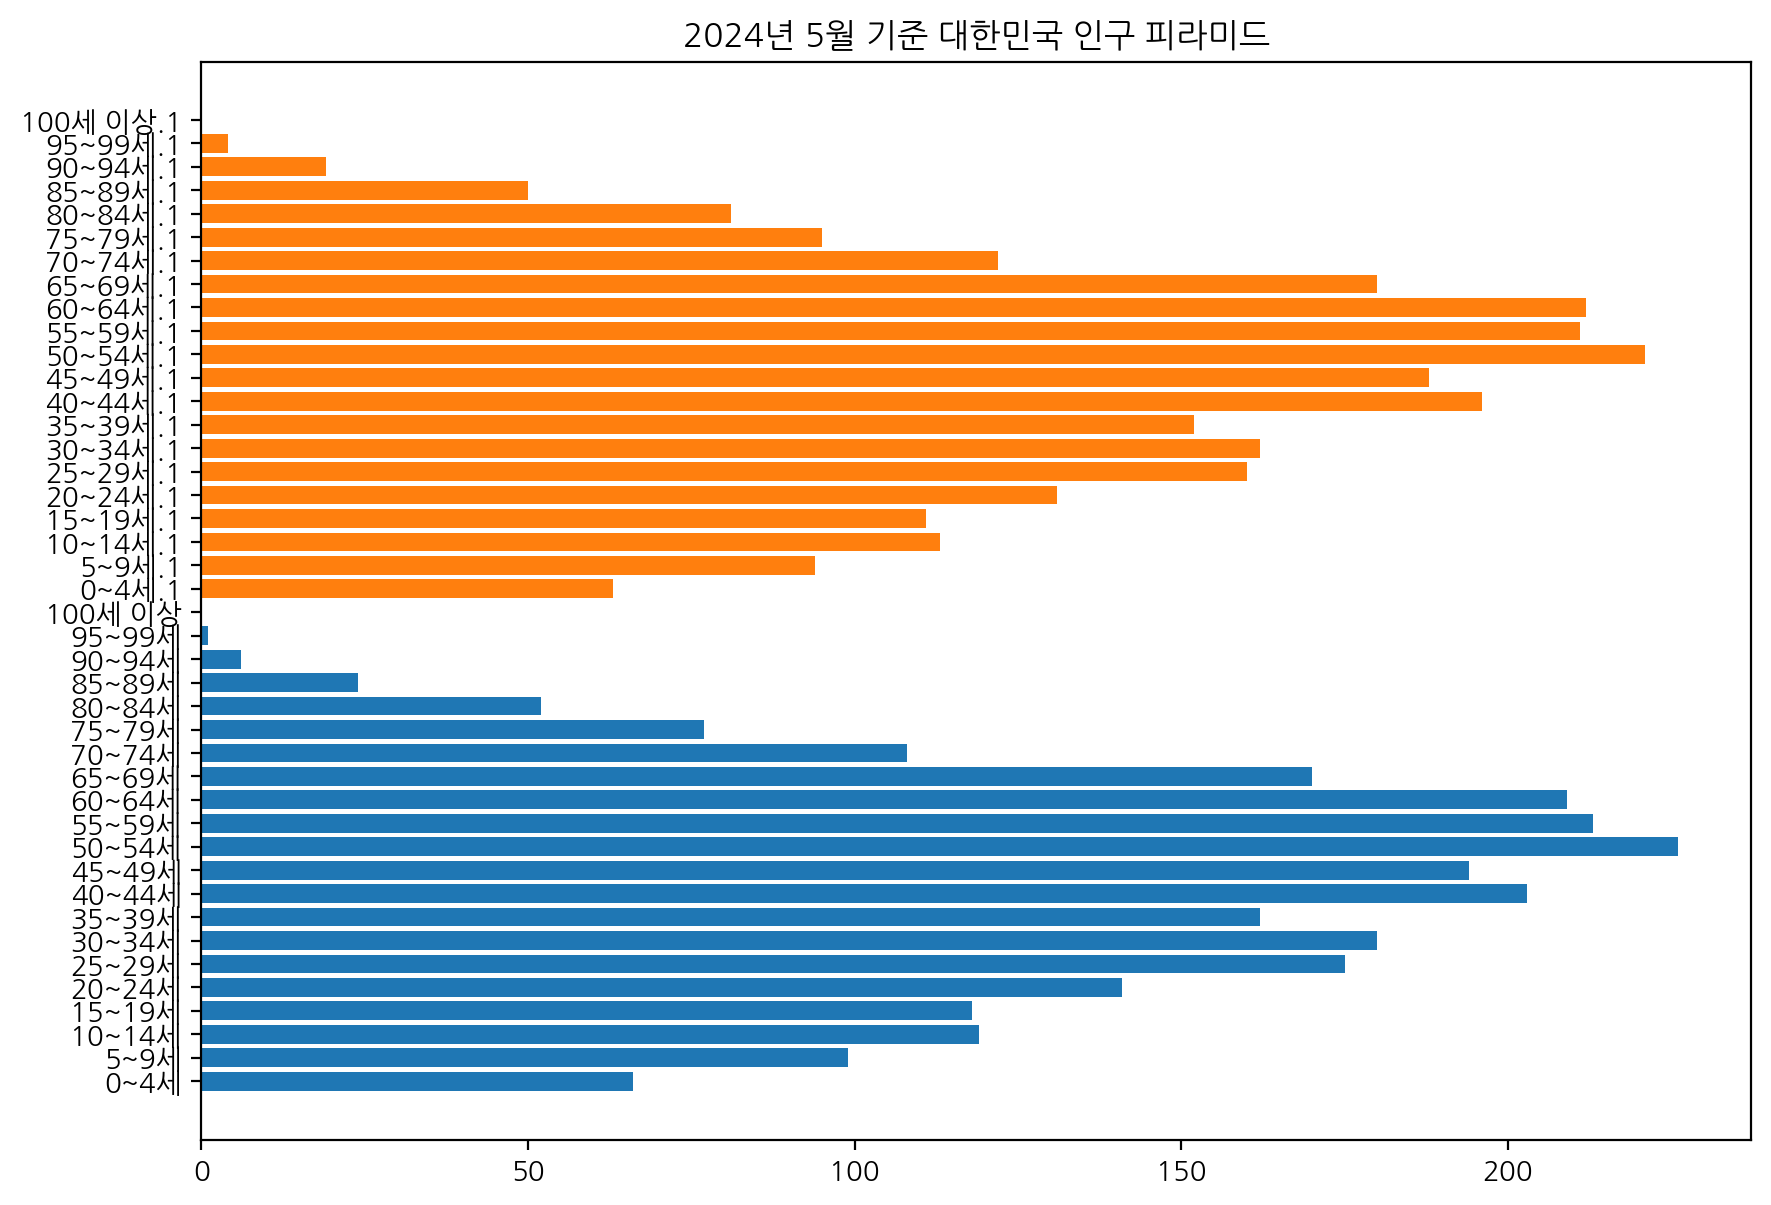

In [52]:
# 숫자가 커서 10000 단위로 나눔
plt.figure(figsize=(10,7))

plt.barh(y=df_man.columns, width=df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns, width=df_woman.iloc[0] // 10000)

plt.title('2024년 5월 기준 대한민국 인구 피라미드')

Text(0.5, 1.0, '2024년 5월 기준 대한민국 인구 피라미드')

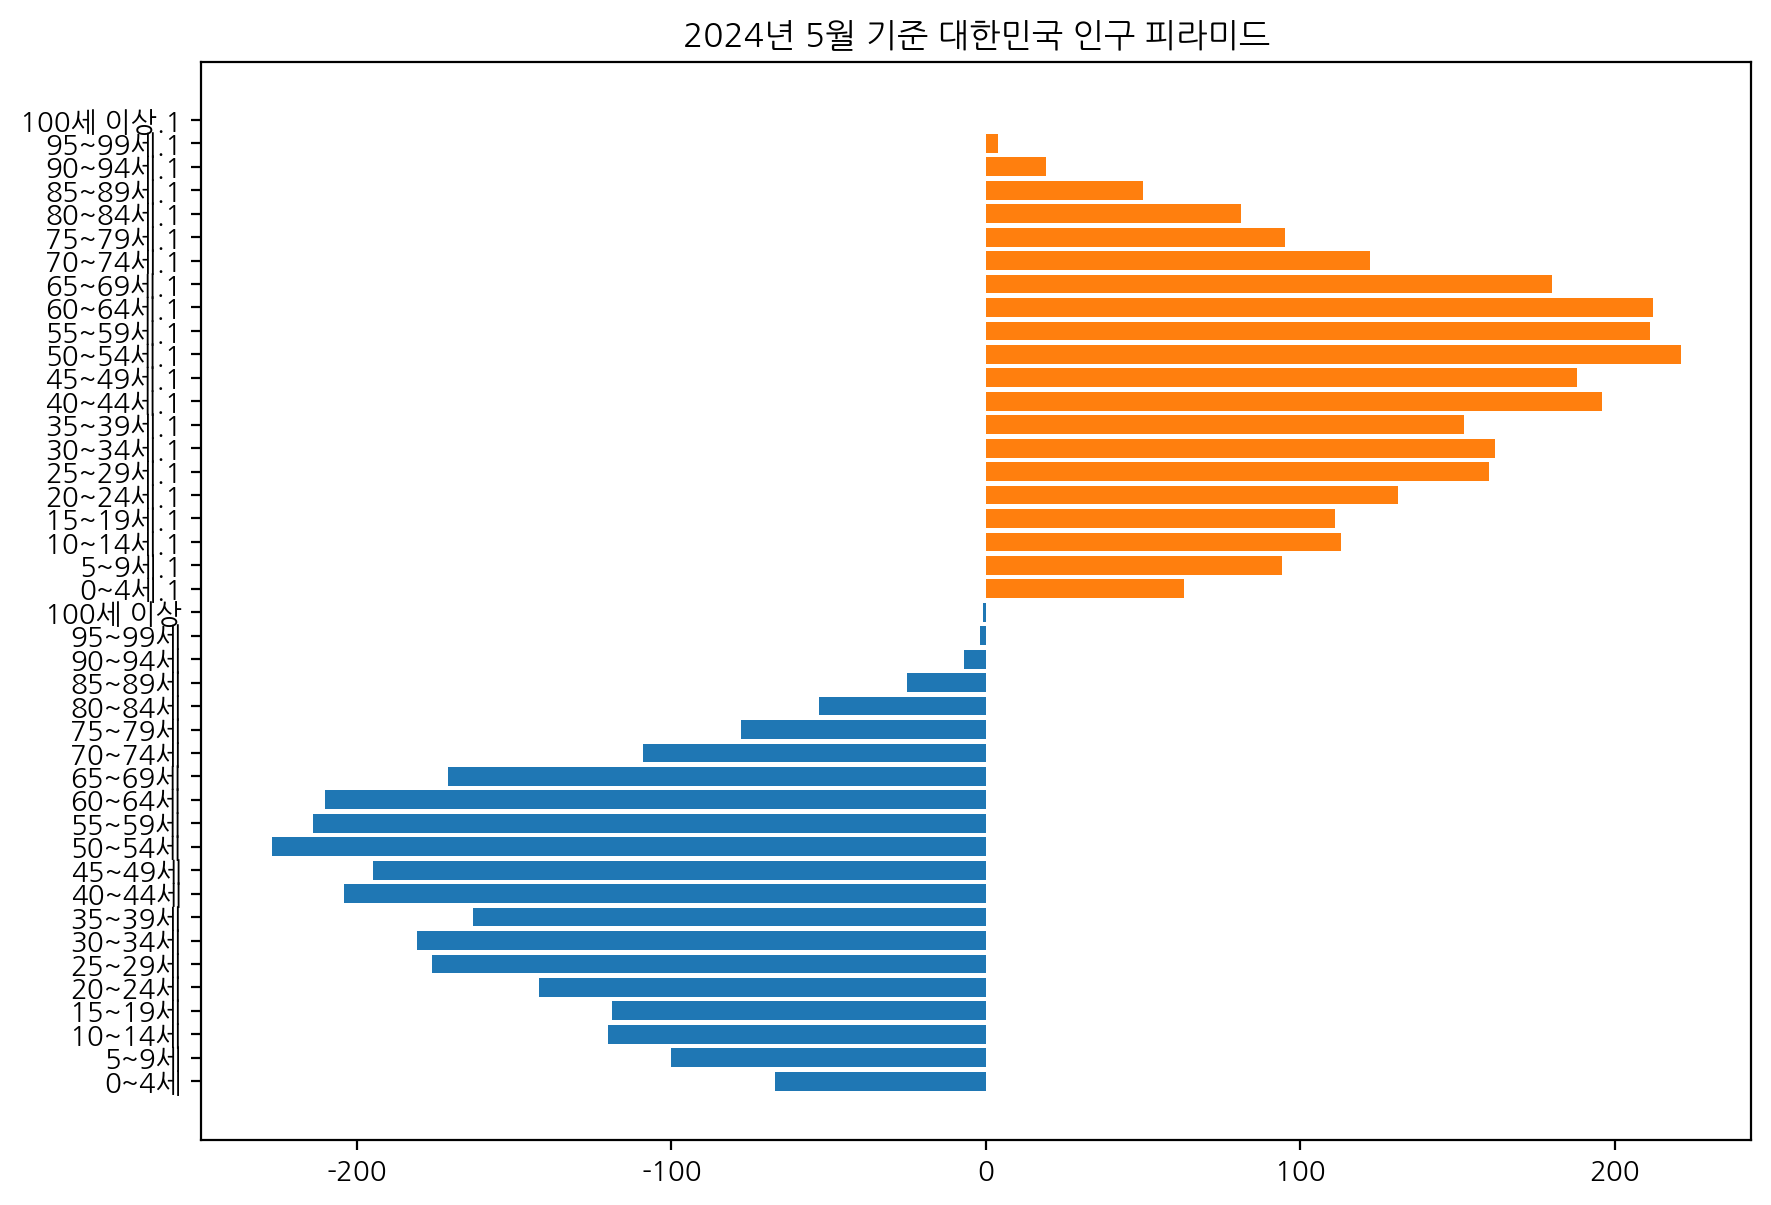

In [53]:
# 마이너스 사용
# width = -df_man.iloc[0]
plt.figure(figsize=(10,7))

plt.barh(y=df_man.columns, width=-df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns, width=df_woman.iloc[0] // 10000)

plt.title('2024년 5월 기준 대한민국 인구 피라미드')

In [54]:
# df_woman 컬럼명 수정 (0~4세.1)
# 컬럼명 일치

df_woman.columns = df_man.columns

Text(0.5, 1.0, '2024년 5월 기준 대한민국 인구 피라미드')

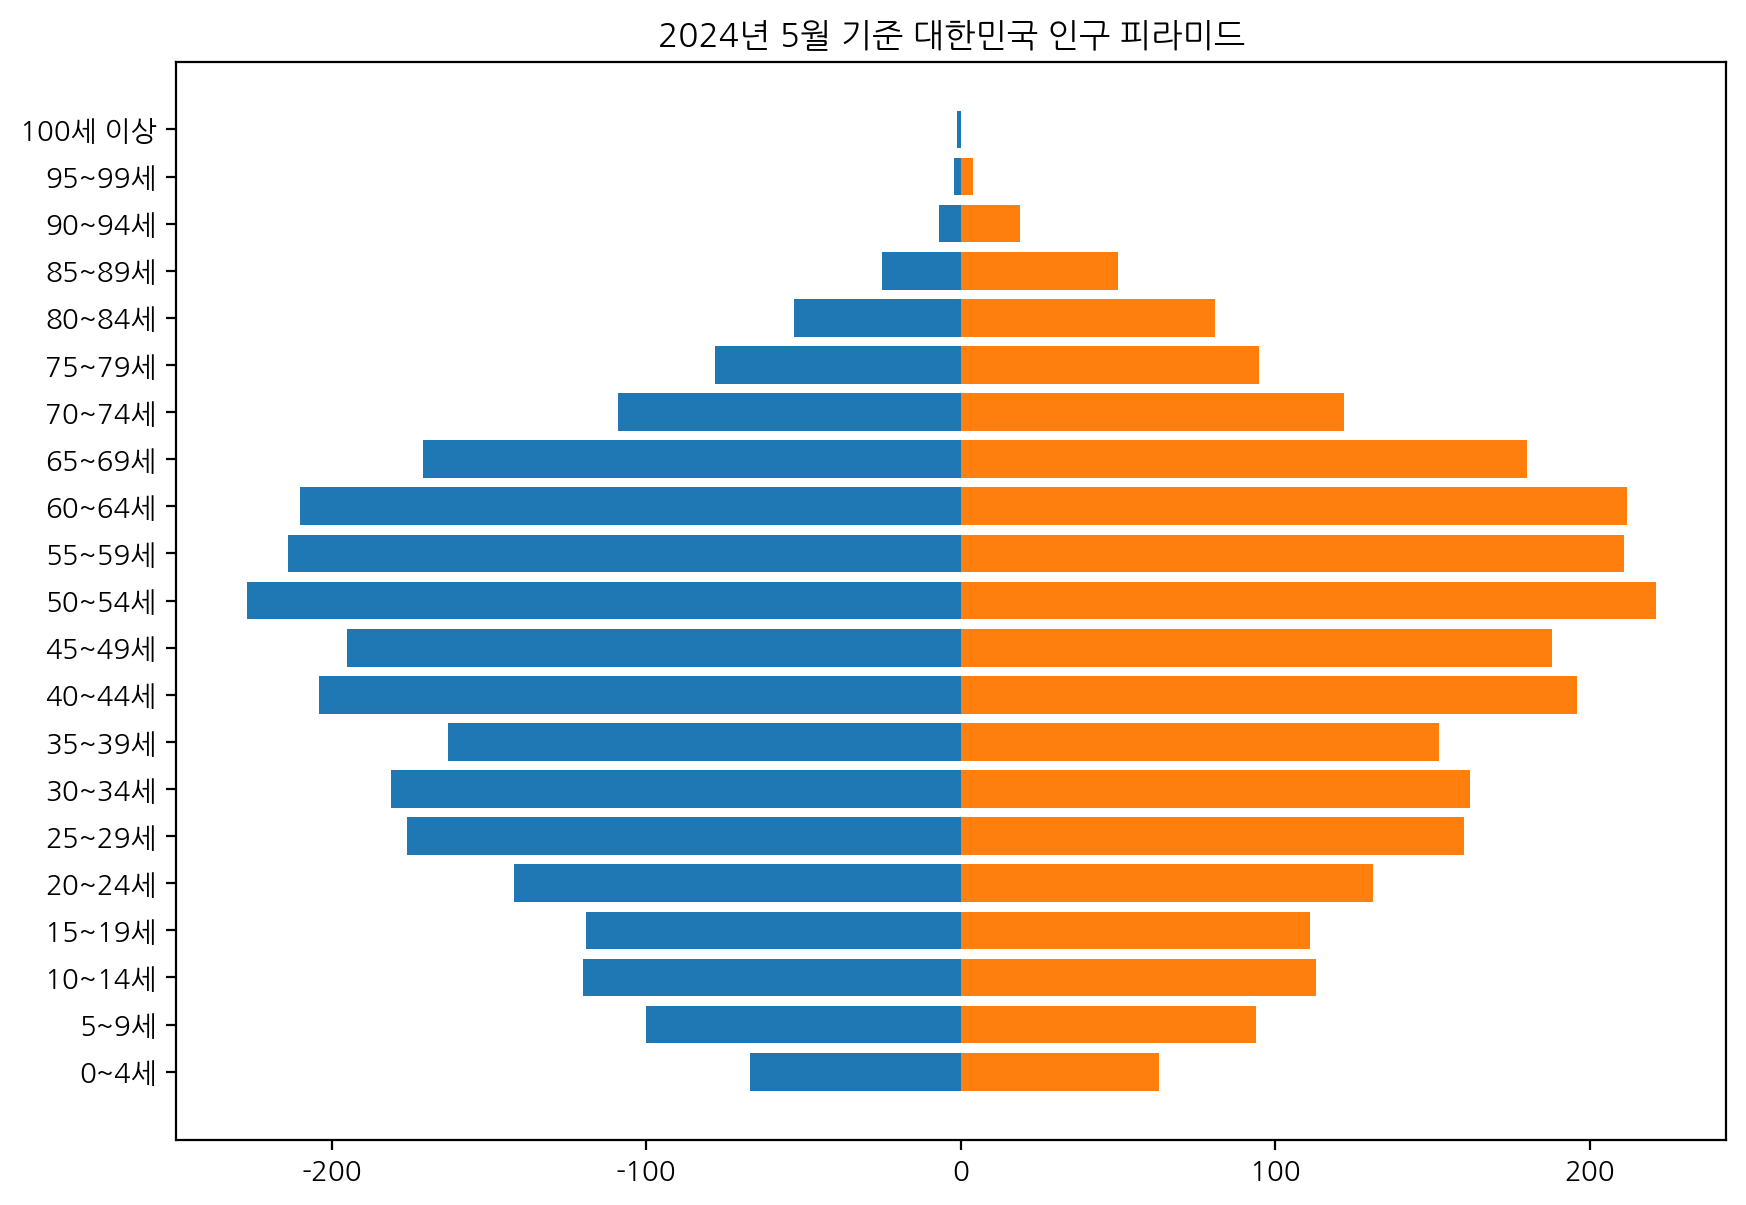

In [55]:
# 컬럼명 일치후 마이너스 사용

plt.figure(figsize=(10,7))

plt.barh(y=df_man.columns, width=-df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns, width=df_woman.iloc[0] // 10000)

plt.title('2024년 5월 기준 대한민국 인구 피라미드')